# Aufgabenblatt 6 - Laplace Transformation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import quad

## Aufgabe 29

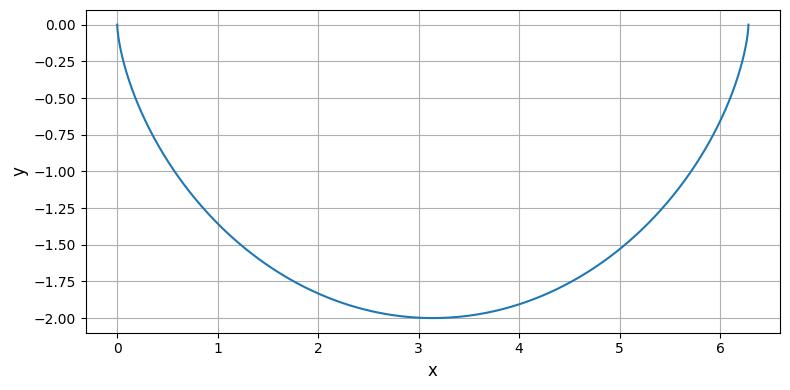

In [13]:
m = 1
q = -1
B = 1
E = 1

w = q*B / m
v0 = E/B
t = np.linspace(0,2*np.pi,1000)

x = lambda t : v0/w * (w*t - np.sin(w*t))
y = lambda t : v0/w * (1 - np.cos(w*t))

plt.figure(figsize=(8, 4))
plt.plot(x(t),y(t))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)

plt.tight_layout()

## Aufagbe 30

In [2]:
def Heat_Equation(x, t, h_func):

    def heat_kernel(x, t):
        if t <= 0: 
            return 0
        return (1 / np.sqrt(4 * np.pi * t)) * np.exp(-x**2 / (4 * t))

    if t <= 0:
        return h_func(x)
    
    # Berechnung mittels Faltung 
    integrand = lambda y: h_func(y) * heat_kernel(x - y, t)
    result, _ = quad(integrand, -10, 10, limit=100)
    return result

# Verschiedene Anfangsbedingungen
def h_gauss(x):
    return np.exp(-x**2)

def h_rect(x):
    return 1.0 if -1 <= x <= 1 else 0.0

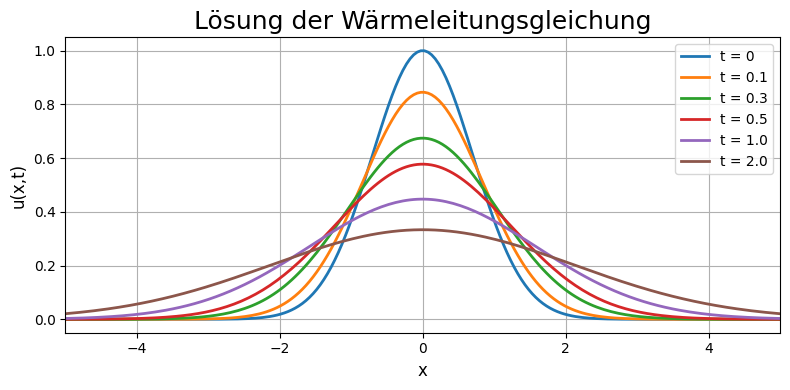

In [5]:
x_values = np.linspace(-5, 5, 200)
time_points = [0, 0.1, 0.3, 0.5, 1.0, 2.0]

h_func = h_gauss
# h_func = h_rect

plt.figure(figsize=(8, 4))

for t in time_points:
    u_values = [Heat_Equation(x, t, h_func) for x in x_values]
    plt.plot(x_values, u_values, label=f't = {t}', linewidth=2)

plt.xlabel('x', fontsize=12)
plt.ylabel('u(x,t)', fontsize=12)
plt.title(f'Lösung der Wärmeleitungsgleichung', fontsize=18)
plt.legend()
plt.grid(True)
plt.xlim(-5, 5)

plt.tight_layout()